# Decoding a TFRecord file from the ImageNet dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.version.VERSION

'2.3.0'

In [3]:
def decode(serialized_example):
    """Decode and resize"""
    features = tf.io.parse_single_example(
        serialized_example,
        features={
            'image/encoded': tf.io.FixedLenFeature([], tf.string),
            'image/class/label': tf.io.FixedLenFeature([], tf.int64),
        })
    image = tf.image.decode_jpeg(features['image/encoded'], channels=3)
    image = tf.image.resize(image, (224, 224))
    label = tf.cast(features['image/class/label'], tf.int64)
    # label = tf.one_hot(label, 1001)
    return image, label

In [10]:
dataset = tf.data.TFRecordDataset('/scratch/snx3000/stud50/imagenet/train-00001-of-01024')
dataset = dataset.map(decode)
dataset = dataset.batch(1)

(1, 224, 224, 3) [368]
(1, 224, 224, 3) [768]
(1, 224, 224, 3) [660]
(1, 224, 224, 3) [921]
(1, 224, 224, 3) [681]
(1, 224, 224, 3) [910]
(1, 224, 224, 3) [574]
(1, 224, 224, 3) [992]
(1, 224, 224, 3) [830]
(1, 224, 224, 3) [920]
(1, 224, 224, 3) [531]
(1, 224, 224, 3) [952]
(1, 224, 224, 3) [682]
(1, 224, 224, 3) [272]
(1, 224, 224, 3) [824]
(1, 224, 224, 3) [485]
(1, 224, 224, 3) [603]
(1, 224, 224, 3) [973]
(1, 224, 224, 3) [911]
(1, 224, 224, 3) [272]
(1, 224, 224, 3) [518]
(1, 224, 224, 3) [350]
(1, 224, 224, 3) [643]
(1, 224, 224, 3) [808]
(1, 224, 224, 3) [550]
(1, 224, 224, 3) [679]
(1, 224, 224, 3) [961]
(1, 224, 224, 3) [311]
(1, 224, 224, 3) [525]
(1, 224, 224, 3) [749]
(1, 224, 224, 3) [550]
(1, 224, 224, 3) [829]
(1, 224, 224, 3) [829]
(1, 224, 224, 3) [339]
(1, 224, 224, 3) [559]
(1, 224, 224, 3) [140]
(1, 224, 224, 3) [115]
(1, 224, 224, 3) [147]
(1, 224, 224, 3) [200]
(1, 224, 224, 3) [512]
(1, 224, 224, 3) [725]
(1, 224, 224, 3) [916]
(1, 224, 224, 3) [970]
(1, 224, 22

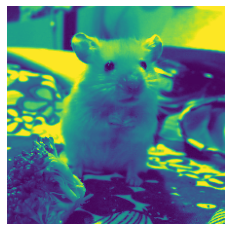

In [11]:
for image, label in dataset.take(102):
    print(image.shape, label.numpy())
    
plt.imshow(image[0, :, :, 1])
plt.axis('off')
plt.show()